# Extracting HOG descriptors


### Google Drive Setup (On PyCharm Skip)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Mask-Or-No-Mask'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

In [13]:

# Path to images and labels
# -------------------------- Paths for PyCharm --------------------------

DATASET_PATH = "../CW_Dataset"
TRAIN_IMAGE_PATH = "../CW_Dataset/train/images"
TRAIN_LABEL_PATH = "../CW_Dataset/train/labels"
TEST_IMAGE_PATH = "../CW_Dataset/test/images"
TEST_LABEL_PATH = "../CW_Dataset/test/labels"
SAVE_DIR = "../npy_dataset"
X_TRAIN_PATH = "../base_dataset/X_train.npy"
X_TEST_PATH = "../base_dataset/X_test.npy"
Y_TRAIN_PATH = "../base_dataset/Y_train.npy"
Y_TEST_PATH = "../base_dataset/Y_test.npy"

# -------------------------- Paths for PyCharm --------------------------

# -------------------------- Paths for Colab --------------------------

# DATASET_PATH = "/content/drive/MyDrive/Mask-Or-No-Mask/CW_Dataset"
# TRAIN_IMAGE_PATH = f"{DATASET_PATH}/train/images"
# TRAIN_LABEL_PATH = f"{DATASET_PATH}/train/labels"
# TEST_IMAGE_PATH = f"{DATASET_PATH}/test/images"
# TEST_LABEL_PATH = f"{DATASET_PATH}/test/labels"
# SAVE_DIR = f"{DATASET_PATH}/../npy_dataset"

# -------------------------- Paths for Colab --------------------------


### Pycharm from here

In [28]:
from skimage import data, exposure
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2

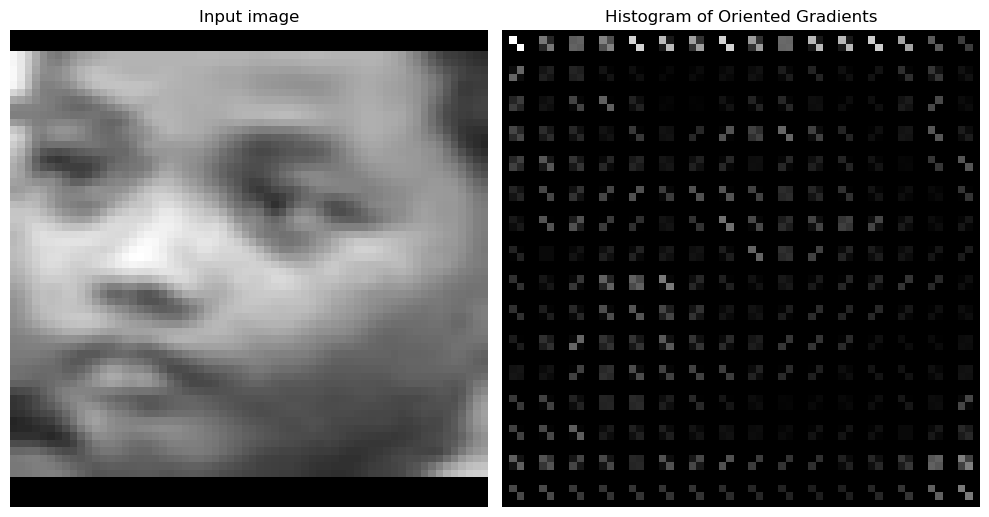

In [62]:
## Image is the .npy in

# X = np.load(X_TRAIN_PATH)
# for image in range(len(X)):
#     # Taken from Lab 5
#     HOG_des, HOG_image = hog(X, orientations=8, pixels_per_cell=(16, 16),
#             cells_per_block=(1, 1), visualize=True, channel_axis=2)

X = np.load(X_TRAIN_PATH)

image = X[random.randint(0, len(X) - 1)]
#image = X[432]

if image.ndim == 3 and image.shape[-1] == 1:
    image = image.squeeze()

# ------------------ Code from Lab 5 (Slightly modified for my use case) ------------------
HOG_des, HOG_image = hog(image,
                         orientations=8,
                         pixels_per_cell=(4, 4),
                         cells_per_block=(8, 8),
                         block_norm="L2-Hys",
                         visualize=True)


fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

ax[0].axis('off')
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')

# Rescale histogram for better display
HOG_image_rescaled = exposure.rescale_intensity(HOG_image, in_range=(0, 10))

ax[1].axis('off')
ax[1].imshow(HOG_image_rescaled, cmap='gray')
ax[1].set_title('Histogram of Oriented Gradients')
fig.tight_layout()
plt.show()
# ------------------ Code from Lab 5 (Slightly modified for my use case) ------------------
